# Feature Engineering: Derive New Input Variables

Apdated from Jason Brownlee. 2020. [Data Preparation for Machine Learning](https://machinelearningmastery.com/data-preparation-for-machine-learning/).

## Overview

This module covers polynomial feature engineering for predictive modeling tasks. We explore how to create new features by transforming existing input variables using polynomial combinations and interactions between features.

## Learning Objectives

- Learn how machine learning algorithms perform with polynomial input features
- Understand how to use polynomial features transform to create new versions of input variables
- Examine how the degree of polynomial impacts the number of input features created
- Apply polynomial feature transformation to real datasets

### Tasks to complete

- Implement polynomial feature transforms
- Evaluate model performance with different polynomial degrees
- Compare results across transformations
- Create visualizations of feature relationships

## Prerequisites

- Python 3.x environment
- Basic understanding of Python programming
- Basic understanding of machine learning concepts
- Familiarity with NumPy and scikit-learn libraries

## Get Started

Setup steps:

- Install required Python packages:
  - numpy
  - pandas
  - scikit-learn
  - matplotlib

### Install required packages

In [1]:
# Installs matplotlib, a comprehensive library for creating static, interactive, and animated visualizations in Python.
%pip install matplotlib

# Installs numpy, the fundamental package for numerical computation in Python, providing support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
%pip install numpy

# Installs pandas, a powerful data manipulation and analysis library, offering data structures like DataFrames for efficiently handling and analyzing structured data.
%pip install pandas

# Installs scikit-learn, a popular machine learning library providing simple and efficient tools for data mining and data analysis, built on NumPy, SciPy, and matplotlib, featuring various classification, regression and clustering algorithms.
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Import necessary libraries

In [2]:
# Import the warnings module to handle warning messages during execution.
import warnings

# Import the Path class from the pathlib module for working with file paths in an object-oriented way.
from pathlib import Path

# Import the pyplot module from matplotlib for plotting graphs and visualizations.
from matplotlib import pyplot as plt

# Import the asarray, mean, and std functions from the numpy library for numerical operations, specifically array conversion, mean, and standard deviation calculations.
from numpy import asarray, mean, std

# Import the DataFrame and read_csv classes from the pandas library for data manipulation and reading CSV files.
from pandas import DataFrame, read_csv

# Import the RepeatedStratifiedKFold and cross_val_score classes from sklearn.model_selection for model evaluation using repeated stratified k-fold cross-validation.
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

# Import the KNeighborsClassifier class from sklearn.neighbors for using the K-Nearest Neighbors classification algorithm.
from sklearn.neighbors import KNeighborsClassifier

# Import the Pipeline class from sklearn.pipeline to construct composite estimators.
from sklearn.pipeline import Pipeline

# Import the LabelEncoder and PolynomialFeatures classes from sklearn.preprocessing for data preprocessing tasks like encoding labels and generating polynomial features.
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures

## Polynomial Features

Polynomial features are generated by raising existing features to a specified exponent. For instance, if a dataset contains a single input feature \( X \), a polynomial feature can be created by squaring its values, resulting in a new feature \( X^2 \). This process can be applied to all input variables in the dataset, transforming each into higher-order terms. Polynomial features are a form of **feature engineering**, where new input features are derived from existing ones. The **degree** of the polynomial determines the number of new features added; for example, a degree of 3 would introduce two additional variables for each input feature. Typically, small degrees like 2 or 3 are used.

Additionally, **interaction terms** can be created by multiplying pairs of input variables, generating new features that capture relationships between them. For instance, a new column might represent the product of two variables. Both polynomial and interaction terms can alter the probability distribution of the data, amplifying the separation between small and large values as the exponent increases. This separation can enhance the performance of certain machine learning algorithms, particularly in **regression tasks** or other problems involving numerical input variables. Linear algorithms, such as **linear regression** and **logistic regression**, often benefit significantly from the inclusion of polynomial features.

## Polynomial Feature Transform

The polynomial feature transform is implemented in the **scikit-learn** Python library through the `PolynomialFeatures` class. This tool creates a new feature matrix containing all polynomial combinations of the input features up to the specified degree. For example, given a two-dimensional input sample \([a, b]\), the degree-2 polynomial features would include \([1, a, b, a^2, ab, b^2]\). This transformation helps capture nonlinear relationships in the data, improving model performance in many cases.

In [3]:
# Demonstrate the types of polynomial features created
# Import the asarray function from the numpy library to create arrays.
from numpy import asarray

# Import the PolynomialFeatures class from sklearn.preprocessing to generate polynomial features.
from sklearn.preprocessing import PolynomialFeatures

# Define the dataset as a numpy array with shape (3, 2).
data = asarray([[2, 3], [2, 3], [2, 3]])

# Print the original dataset to the console.
print("Original Data:")

# Print the 'data' numpy array.
print(data)

# Create a PolynomialFeatures object, setting the degree of the polynomial to 2.
trans = PolynomialFeatures(degree=2)

# Fit the PolynomialFeatures transformer to the 'data' and then transform 'data' into polynomial features.
data = trans.fit_transform(data)

# Print a newline character and a message indicating the polynomial features are of degree 2.
print("\nPolynomial Features (Degree=2):")

# Print the 'data' array after the polynomial feature transformation.
print(data)

Original Data:
[[2 3]
 [2 3]
 [2 3]]

Polynomial Features (Degree=2):
[[1. 2. 3. 4. 6. 9.]
 [1. 2. 3. 4. 6. 9.]
 [1. 2. 3. 4. 6. 9.]]


When the example is executed, it first displays the raw data, which consists of two features (columns), each containing identical values of either 2 or 3. Subsequently, polynomial features are generated, resulting in a total of six features, consistent with the description provided earlier.

The degree parameter determines the number of features created and is set to 2 by default. The interaction_only parameter, which defaults to False, specifies whether to include only the raw values (degree 1) and their interactions (products of pairs of values). Additionally, the include_bias parameter is set to True by default, ensuring the inclusion of a bias feature in the output.

## Wisconsin Breast Cancer Dataset

The Wisconsin Breast Cancer Dataset (WBCD) is a widely used dataset for breast cancer diagnosis. It contains features computed from digitized images of fine needle aspirate (FNA) of breast masses, which describe characteristics of cell nuclei.

### **Dataset Information:**
- **Number of Instances:** 569
- **Number of Features:** 30 (excluding the ID column)
- **Target Variable:** Diagnosis (Malignant or Benign)

### **Feature Description:**
Each instance in the dataset has 30 real-valued features extracted from images of cell nuclei, including:
- Radius (mean of distances from center to points on the perimeter)
- Texture (standard deviation of gray-scale values)
- Perimeter
- Area
- Smoothness
- Compactness
- Concavity
- Concave points
- Symmetry
- Fractal dimension

### **Insights:**
- Features such as **concavity, concave points, and radius** tend to have higher importance in distinguishing malignant from benign tumors.
- **Malignant tumors** generally have higher values in most of these features compared to benign ones.
- The dataset is commonly used in machine learning models for binary classification.

### **Source:**
This dataset is available from the UCI Machine Learning Repository: [Wisconsin Breast Cancer Dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).


The **Wisconsin Breast Cancer Dataset** is crucial for predictive modeling in medical research. It provides meaningful insights into breast cancer diagnosis and is often used for testing machine learning algorithms like Support Vector Machines, Random Forest, and Neural Networks.

Further analysis could involve feature selection techniques and hyperparameter tuning to optimize classification performance.

### Loading data and summarizing the variables

In [4]:
# Load the Wisconsin Breast Cancer Dataset from ../../Data
# Defines the file path to the Wisconsin Breast Cancer dataset.
data_path = "../../Data/wdbc.data"

# Load and summarize the dataset
# Reads the data from the specified file path into a pandas DataFrame, assuming no header row.
dataset = read_csv(data_path, header=None)

# Add column names (from the dataset description)
# Defines a list of column names for the dataset, based on the dataset description.
columns = [
    "id", "diagnosis",  # Target: M=Malignant, B=Benign
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean",
    "smoothness_mean", "compactness_mean", "concavity_mean",
    "concave_points_mean", "symmetry_mean", "fractal_dimension_mean",
    "radius_se", "texture_se", "perimeter_se", "area_se",
    "smoothness_se", "compactness_se", "concavity_se",
    "concave_points_se", "symmetry_se", "fractal_dimension_se",
    "radius_worst", "texture_worst", "perimeter_worst", "area_worst",
    "smoothness_worst", "compactness_worst", "concavity_worst",
    "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"
]
# Assigns the defined list of column names to the DataFrame.
dataset.columns = columns

# Summarize the dataset
# Prints a header indicating the display of the first 5 rows.
print("\nFirst 5 rows:")

# Prints the first 5 rows of the DataFrame to display sample data.
print(dataset.head())

# Prints a header indicating the display of the dataset shape.
print("\nDataset Shape:", dataset.shape)

# Prints the shape of the DataFrame (number of rows and columns).
print("\nSummary Statistics:")

# Prints summary statistics for each numerical column in the DataFrame (count, mean, std, min, quartiles, max).
print(dataset.describe())


First 5 rows:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_

### Histograms of the variables

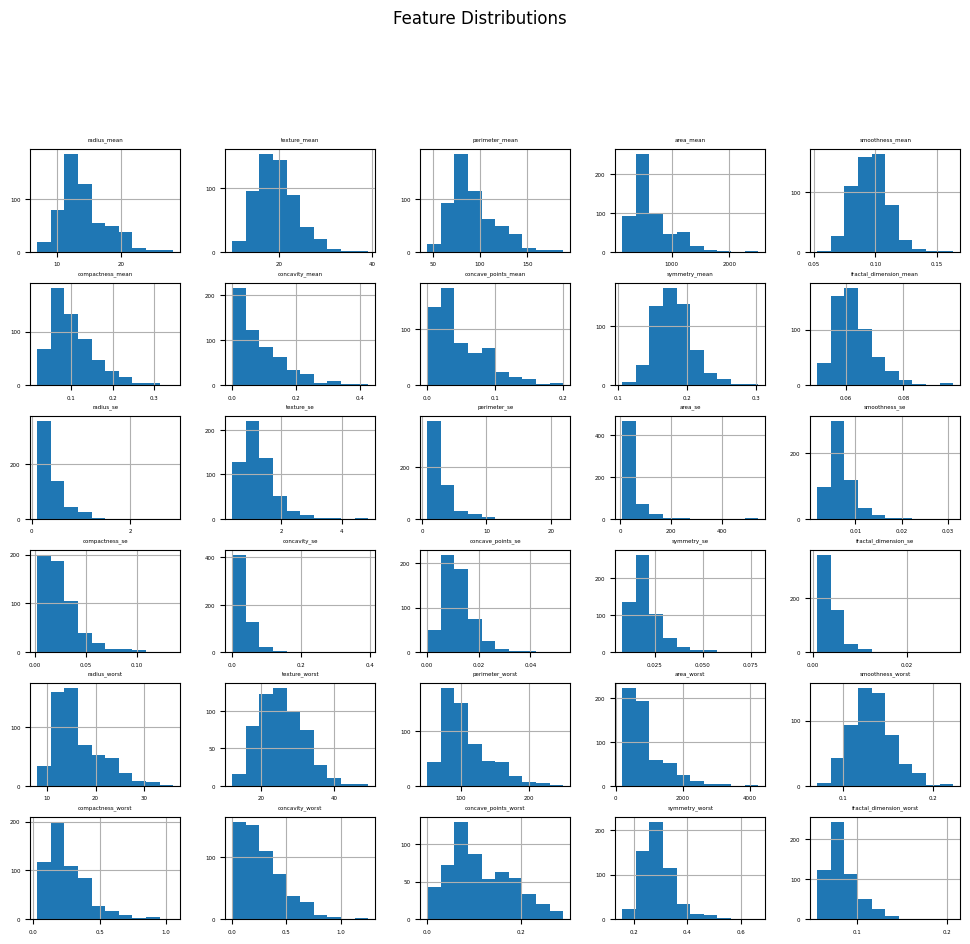

In [5]:
# Creates histograms for all columns in the 'dataset' DataFrame starting from the third column (index 2) to the end. Sets x and y label sizes, and figure size.
fig = dataset.iloc[:, 2:].hist(xlabelsize=4, ylabelsize=4, figsize=(12, 10))

# Iterates through each histogram subplot in the figure and sets the title size to 4.
[x.title.set_size(4) for x in fig.ravel()]

# Sets the suptitle (overall title) for the entire figure to "Feature Distributions", adjusting vertical position for better layout.
plt.suptitle("Feature Distributions", y=1.02)

# Displays the generated histograms plot.
plt.show()

### Evaluate KNN on the raw dataset

In [6]:
# Separate data into input and output columns
X = dataset.iloc[:, 2:].values  # Features (all columns except ID and diagnosis)
y = dataset["diagnosis"].values  # Target (M=Malignant, B=Benign)

# Encode labels (M=1, B=0)
y = LabelEncoder().fit_transform(y)

# Define and configure the model
model = KNeighborsClassifier()

# Evaluate the model
# Defines cross-validation splitting strategy using RepeatedStratifiedKFold for robust evaluation.
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Performs cross-validation to evaluate the 'model' using features 'X' and target 'y', scoring by 'accuracy'.
n_scores = cross_val_score(model, X, y, scoring="accuracy", cv=cv, n_jobs=-1)

# Report model performance
print("\nKNN Accuracy (Raw Data): %.3f (%.3f)" % (mean(n_scores), std(n_scores)))


KNN Accuracy (Raw Data): 0.934 (0.030)


### Visualize a polynomial features transform of the dataset

In [7]:
# Perform a polynomial features transform of the dataset
# Initialize the PolynomialFeatures transformer with a degree of 3
# This will create polynomial features up to the third degree (e.g., X, X^2, X^3)
trans = PolynomialFeatures(degree=3)

# Apply the polynomial transformation to the input data X
# This generates a new feature matrix with all polynomial combinations of the input features
data = trans.fit_transform(X)

# Convert the array back to a dataframe
dataset_transformed = DataFrame(data)

# Summarize
print("\nTransformed Dataset Shape:", dataset_transformed.shape)

# Evaluate KNN on the dataset with polynomial features transform

# Define a PolynomialFeatures transformer with a degree of 3
# This will create polynomial features up to the third degree (e.g., X, X^2, X^3)
trans = PolynomialFeatures(degree=3)

# Initialize a K-Nearest Neighbors (KNN) classifier
model = KNeighborsClassifier()

# Create a pipeline that combines the polynomial feature transformation and the KNN model
# - "t": Applies the polynomial feature transformation
# - "m": Fits the KNN model to the transformed data
pipeline = Pipeline(steps=[("t", trans), ("m", model)])

# Evaluate the pipeline using cross-validation
# RepeatedStratifiedKFold ensures stratified sampling and repeats the cross-validation process
# - n_splits=10: The dataset is split into 10 folds for cross-validation
# - n_repeats=3: The entire cross-validation process is repeated 3 times
# - random_state=1: Ensures reproducibility by fixing the random seed
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Perform cross-validation on the pipeline
# - pipeline: The model pipeline (polynomial features + KNN classifier)
# - X: The input features
# - y: The target labels
# - scoring="accuracy": Evaluates the model using accuracy as the metric
# - cv=cv: Uses the RepeatedStratifiedKFold cross-validation strategy
# - n_jobs=-1: Enables parallel processing to speed up computation
n_scores = cross_val_score(pipeline, X, y, scoring="accuracy", cv=cv, n_jobs=-1)

# Report the performance of the pipeline
# - mean(n_scores): Calculates the mean accuracy across all cross-validation folds
# - std(n_scores): Calculates the standard deviation of the accuracy scores
# - "%.3f": Formats the output to display values with 3 decimal places
print("\nKNN Accuracy (Polynomial Features): %.3f (%.3f)" % (mean(n_scores), std(n_scores)))


Transformed Dataset Shape: (569, 5456)

KNN Accuracy (Polynomial Features): 0.930 (0.026)


### Compare the effect of the degree on the number of created features

Degree: 1, Features: 31
Degree: 2, Features: 496
Degree: 3, Features: 5456
Degree: 4, Features: 46376


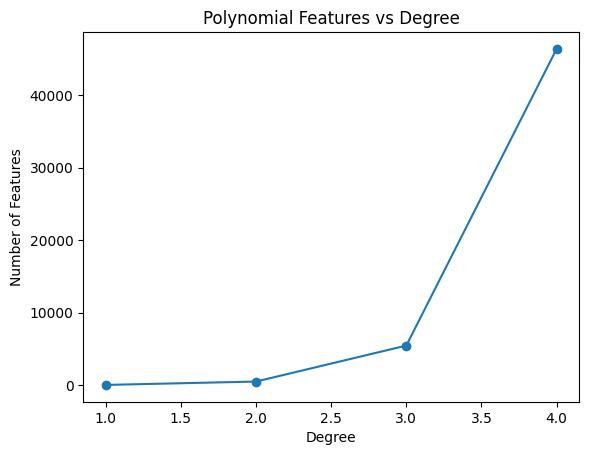

In [8]:
# Calculate change in number of features

# Initialize a list to store the number of features generated for each degree
num_features = []

# Define a range of degrees to test (from 1 to 4)
degrees = list(range(1, 5))

# Iterate over each degree to calculate the number of polynomial features
for d in degrees:
    # Create a PolynomialFeatures transformer with the current degree
    trans = PolynomialFeatures(degree=d)
    
    # Fit and transform the input data X to generate polynomial features
    data = trans.fit_transform(X)
    
    # Record the number of features (columns) in the transformed data
    num_features.append(data.shape[1])
    
    # Summarize the results by printing the degree and corresponding number of features
    print("Degree: %d, Features: %d" % (d, data.shape[1]))

# Plot the relationship between the degree of polynomial and the number of features
plt.plot(degrees, num_features, marker='o')  # Plot with markers for each degree
plt.xlabel("Degree")  # Label for the x-axis
plt.ylabel("Number of Features")  # Label for the y-axis
plt.title("Polynomial Features vs Degree")  # Title of the plot
plt.show()  # Display the plot

### Understanding Polynomial Feature Expansion

#### Plot Overview
The plot visualizes how the number of features in a dataset changes as the degree of polynomial expansion increases. It demonstrates that the number of features grows exponentially with higher polynomial degrees.

##### Key Observations:
- **X-axis (Degree of Polynomial Features)**: Represents the degree used for polynomial feature generation.
- **Y-axis (Number of Features)**: Represents the total number of features after applying polynomial expansion.
- **Low Degrees (1 and 2)**: The number of features remains relatively small, making the dataset manageable.
- **Higher Degrees (3 and above)**: The number of features increases dramatically, illustrating the **curse of dimensionality**.

#### Interpretation:
- **Degree 1**: Represents the original dataset with no polynomial expansion.
- **Degrees 2 and 3**: Show a moderate increase in the number of features, capturing more complex relationships.
- **Degree 4 and Beyond**: Exhibit an exponential rise in the number of features, which can lead to computational inefficiency and overfitting.

##### Summary:
This plot highlights the trade-off between model complexity and computational cost when using polynomial features. While higher-degree polynomials can model intricate patterns, they also risk overfitting and increased computational demands. Therefore, selecting an appropriate polynomial degree is crucial for balancing model performance and efficiency.

## Explore the effect of degree on accuracy for the polynomial features transform

> Degree=1, Accuracy: 0.934 (0.030)
> Degree=2, Accuracy: 0.930 (0.026)
> Degree=3, Accuracy: 0.930 (0.026)
> Degree=4, Accuracy: 0.930 (0.027)


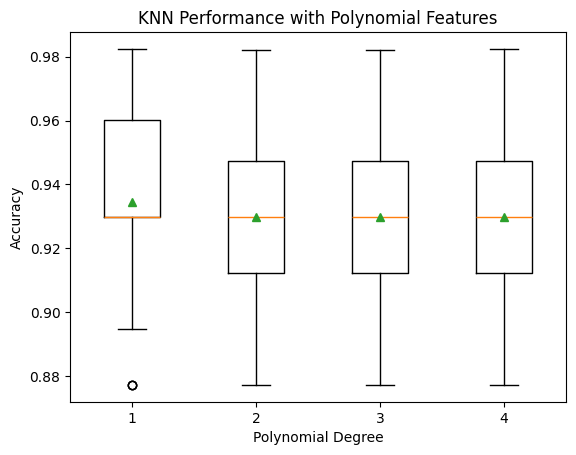

In [9]:
warnings.filterwarnings("ignore")

# Defines a function called 'get_models' that returns a dictionary of machine learning pipelines.
def get_models():
    # Initializes an empty dictionary called 'models' to store the pipelines.
    models = {}
    # Iterates through degrees from 1 to 4 (exclusive of 5) to create polynomial features.
    for d in range(1, 5):
        # Define the pipeline
        # Creates a PolynomialFeatures transformer with the current degree 'd'.
        trans = PolynomialFeatures(degree=d)
        # Creates a KNeighborsClassifier model with default parameters.
        model = KNeighborsClassifier()
        # Stores the pipeline in the 'models' dictionary with the degree 'd' as the key.
        models[str(d)] = Pipeline(steps=[("t", trans), ("m", model)])
    # Returns the dictionary 'models' containing pipelines for different polynomial degrees.
    return models

# Evaluate a given model using cross-validation
# Defines a function called 'evaluate_model' that takes a model, features (X), and labels (y) as input to evaluate model performance.
def evaluate_model(model, X, y):
    # Initializes RepeatedStratifiedKFold cross-validation with 10 splits, 3 repeats, and a fixed random state for reproducibility.
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # Performs cross-validation using the provided model, features (X), and labels (y), scoring accuracy, using the defined cross-validation strategy (cv), and utilizing all available CPU cores (n_jobs=-1).
    scores = cross_val_score(model, X, y, scoring="accuracy", cv=cv, n_jobs=-1)
    # Returns the array of accuracy scores obtained from cross-validation.
    return scores

# Get the models to evaluate
models = get_models()

# Evaluate the models and store results
results = []
names = []
# Iterate through each item (model name and model object) in the 'models' dictionary.
for name, model in models.items():
    # Evaluate the current 'model' using the 'evaluate_model' function with features 'X' and labels 'y', and store the scores.
    scores = evaluate_model(model, X, y)
    # Append the calculated 'scores' to the 'results' list.
    results.append(scores)
    # Append the current 'model' name to the 'names' list.
    names.append(name)
    # Print the model's degree (name), mean accuracy score, and standard deviation of accuracy scores, formatted to 3 decimal places.
    print("> Degree=%s, Accuracy: %.3f (%.3f)" % (name, mean(scores), std(scores)))

# Plot the performance of the KNN model with different polynomial degrees for comparison
# - results: A list of accuracy scores for each polynomial degree
# - labels=names: Labels for the x-axis, corresponding to the polynomial degrees
# - showmeans=True: Displays the mean accuracy for each degree as a marker in the boxplot
plt.boxplot(results, labels=names, showmeans=True)

# Label the x-axis to indicate the polynomial degrees being compared
plt.xlabel("Polynomial Degree")

# Label the y-axis to indicate the accuracy metric
plt.ylabel("Accuracy")

# Add a title to the plot to describe its purpose
plt.title("KNN Performance with Polynomial Features")

# Display the plot
plt.show()

### KNN Performance with Polynomial Features

#### Plot Explanation
The box plot illustrates the **accuracy** of a K-Nearest Neighbors (KNN) classifier when using different polynomial feature transformations. The x-axis represents the **polynomial degree**, while the y-axis shows the **accuracy** of the model.

##### Key Observations:
- The **median accuracy** (represented by the orange line) remains relatively stable across polynomial degrees 1 to 4.
- The **mean accuracy** (indicated by the green triangle) is consistent across different degrees, suggesting that increasing polynomial features does not significantly enhance performance.
- The **variance (spread of the box)** increases slightly for higher polynomial degrees, indicating that additional features may introduce more variability in model performance.
- The presence of **outliers** at lower degrees highlights occasional drops in accuracy for specific runs.

#### Interpretation:
- **Polynomial Degree 1**: The model performs well, with a high median accuracy and minimal variance.
- **Polynomial Degrees 2-4**: While accuracy remains stable, the slight increase in variance suggests that additional polynomial features do not substantially improve KNN performance.

#### Summary:
- Applying polynomial feature expansion does not necessarily improve KNN model accuracy.
- Higher polynomial degrees increase feature complexity but may not provide better predictive power, potentially leading to overfitting or computational inefficiency.

## Conclusion

Through this module, we learned how to create polynomial features to potentially improve model performance. We explored the impact of different polynomial degrees on feature space dimensionality and model accuracy. The techniques demonstrated show how feature engineering can expose non-linear relationships in data that may improve predictive modeling results.

## Clean up

Remember to shut down your Jupyter Notebook environment and delete any unnecessary files or resources once you've completed the tutorial.￼